# Monday, February 20th 2023

## Mutable vs immutable lists

In [6]:
a = [1,2,3]
print(a)

[1, 2, 3]


In [7]:
b = a
print(b)

[1, 2, 3]


What happens if we modify `b`?

Experiment: Set the first item in `b` to be 100

In [8]:
b[0] = 100
print(b)

[100, 2, 3]


In [9]:
print(a)

[100, 2, 3]


In [10]:
a[1] = -5
print(b)

[100, -5, 3]


Because we defined `b` as being `a`, any changes we make make to `b` are propogated back to `a`.

In [5]:
a = [1,2,3]
b = [1,2,3]

print(a)

b[0] = 100

print(a)

[1, 2, 3]
[1, 2, 3]


Warning: Be careful when defining variables in terms of other variables involving lists.

We avoid this possible issue by creating a new copy of the list. This can be done using `list(a)`

In [11]:
a = [1,2,3]

b = list(a)

print(a)
print(b)

[1, 2, 3]
[1, 2, 3]


In [12]:
b[0] = 100

print(a)
print(b)

[1, 2, 3]
[100, 2, 3]


We can check if two objects are "equal" vs "the same object":

In [13]:
a = [1,2,3]
b = [1,2,3]

print(a == b)

True


In [14]:
help(id)

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)



In [15]:
id(a)

2689928537600

In [16]:
id(b)

2689928537856

In [17]:
id(a) == id(b)

False

We defined both lists as `[1,2,3]`, but they have different IDs and are different objects. Changing one will not affect the other.

In [18]:
a = [1,2,3]
b = a

In [19]:
a == b

True

In [20]:
id(a) == id(b)

True

Here both objects have the same ID (i.e. they are the same object). Changing one will change the other.

## More about accessing list elements: Slicing

In [24]:
mylist = []
for i in range(20):
    mylist.append(i)
    
print(mylist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [28]:
mylist[-2]

18

We can grab "slices" of elements using `:`:

In [29]:
mylist[2:7]

[2, 3, 4, 5, 6]

`mylist[i:j]` will grab the elements `mylist[i], mylist[i+1], ..., mylist[j-1]`

In [31]:
mylist[:4]

[0, 1, 2, 3]

In [32]:
mylist[15:]

[15, 16, 17, 18, 19]

`mylist[:j]` will start at index 0. `mylist[i:]` will stop at the end of the list.

In [33]:
mylist[::2]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [34]:
mylist[::4]

[0, 4, 8, 12, 16]

In [35]:
mylist[1::2]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [36]:
mylist[3:18:4]

[3, 7, 11, 15]

`mylist[i:j:k]` will start at `mylist[i]`, stop before `mylist[j-1]`, in steps of `k`

**Exercise:** Define a function `f(mylist)` that takes in a list `mylist`, creates a new list that contains all of the odd-indices first, followed by all of the even indices.

In [38]:
def f(mylist):
    newlist = []
    for i in range(len(mylist)):
        if i % 2 == 1:
            newlist.append(i)
    for i in range(len(mylist)):
        if i % 2 == 0:
            newlist.append(i)
    return newlist

In [40]:
def f(mylist):
    return list(mylist[1::2] + mylist[::2])

In [41]:
f([0,1,2,3,4,5])

[1, 3, 5, 0, 2, 4]

## List comprehension

In Python, we can **list comprehension** to easily generate lists of sublists.

In [42]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [43]:
[i**2 for i in range(5)]

[0, 1, 4, 9, 16]

In [44]:
[i**2 for i in range(20) if i % 2 == 0]

[0, 4, 16, 36, 64, 100, 144, 196, 256, 324]

In [45]:
mylist = [(3,4,5),(4,3,5),(5,12,13),(12,5,13), (6,8,10), (8,6,10)]

In [47]:
[triple for triple in mylist if triple[0] % 2 == 0]

[(4, 3, 5), (12, 5, 13), (6, 8, 10), (8, 6, 10)]

In [50]:
doubles = [triple[:-1] for triple in mylist]
doubles

[(3, 4), (4, 3), (5, 12), (12, 5), (6, 8), (8, 6)]

In [51]:
[(a,b) for (a,b,c) in mylist]

[(3, 4), (4, 3), (5, 12), (12, 5), (6, 8), (8, 6)]

In [53]:
[c**2 == a**2 + b**2 for (a,b,c) in mylist]

[True, True, True, True, True, True]

**Example:** A new `get_primes(n)` function

In [64]:
def get_primes(n):
    is_prime = [True for i in range(n+1)]  # This list will in the end be True for every prime index
                                           # and False for every non-prime index
    is_prime[0] = False                    # 0 is not prime
    is_prime[1] = False                    # 1 is not prime
    
    # Now, let's go through each integer up to n
    # If the integer is prime, set every multiple to not prime.
    for i in range(2,n+1):
        myslice = is_prime[2*i::i]                     # Grab all elements that we want False
        is_prime[2*i::i] = [False for i in range(len(myslice))] # Build a list of False with the right length
                                                       # then replace myslice with the False list
    
    primes = [ i for i in range(n+1) if is_prime[i] ]
    
    return primes

In [65]:
get_primes(20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [66]:
def double_f(n):
    return 2*n

mylist = [ i for i in range(20)]

[double_f(n) for n in mylist]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

## Plotting in Python

We will use the `matplotlib` package, specifically the `pyplot` module within that package.

In [69]:
import matplotlib.pyplot as plt

In [77]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

In [73]:
x = [i for i in range(20)]
y = [i**2 for i in x]

plt.plot(x,y)

We can force inline plotting (i.e. figures appearing in the notebook) using `%matplotlib inline`

In [74]:
%matplotlib inline

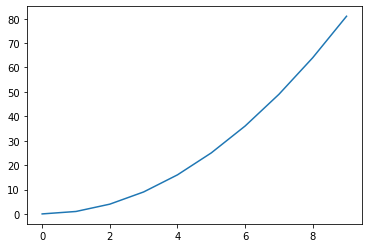

In [76]:
x = [i for i in range(10)]
y = [i**2 for i in x]

plt.plot(x,y)

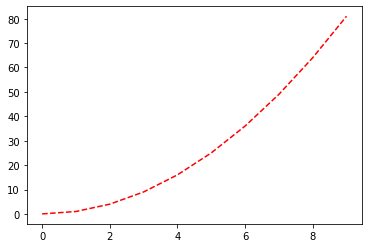

In [79]:
plt.plot(x,y,'r--')

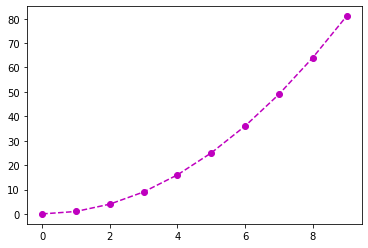

In [83]:
plt.plot(x,y,'mo--')

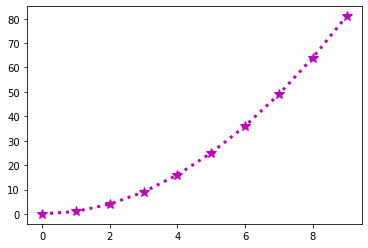

In [94]:
plt.plot(x,y,color='m',marker='*',linestyle=':',markersize = 10,linewidth=3)

Colors:
 - `k`: black
 - `w`: white
 - `r`: red
 - `y`: yellow
 - `b`: blue
 - `m`: magenta
 - `c`: cyan
 - `g`: green
 
Markers:
 - `.`: small dot
 - `o`: bigger dot
 - `*`: star

**Exercise:** Create a plot that shows $x$ vs $\sin(x)$ for $x$ between $0$ and $2\pi$

In [101]:
from math import sin, pi, cos

In [102]:
N = 100

x = [2*pi*i/N for i in range(N+1)]
sinx = [sin(xx) for xx in x]
cosx = [cos(xx) for xx in x]

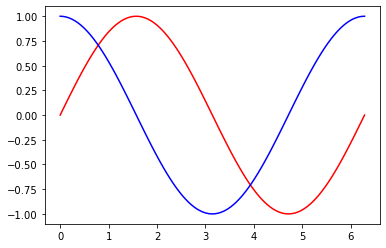

In [104]:
plt.plot(x,sinx,'r')
plt.plot(x,cosx,'b')

We can label data curves using the `label` keyword, then calling `plt.legend()`

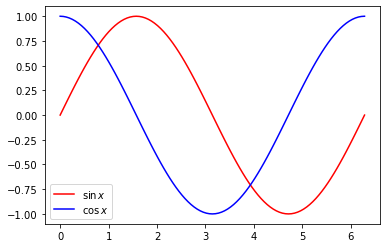

In [107]:
plt.plot(x,sinx,'r',label='$\sin x$')
plt.plot(x,cosx,'b',label='$\cos x$')

plt.legend()

We can add $x$-labels and $y$-labels using `plt.xlabel` and `plt.ylabel`:

Text(0, 0.5, '$y$')

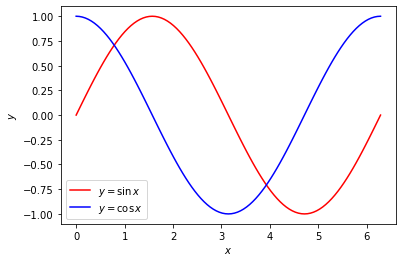

In [109]:
plt.plot(x,sinx,'r',label='$y = \sin x$')
plt.plot(x,cosx,'b',label='$y = \cos x$')

plt.legend()

plt.xlabel('$x$')
plt.ylabel('$y$')

We can add a title using `plt.title`:

Text(0.5, 1.0, 'My plot')

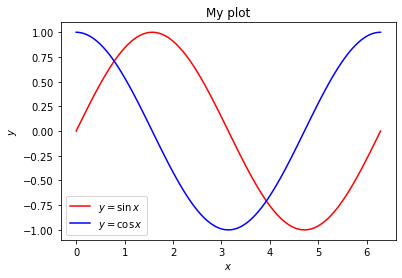

In [110]:
plt.plot(x,sinx,'r',label='$y = \sin x$')
plt.plot(x,cosx,'b',label='$y = \cos x$')

plt.legend()

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('My plot')

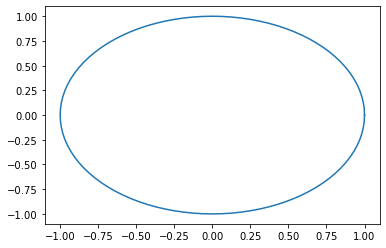

In [112]:
plt.plot(cosx,sinx)

We can use a equal aspect ratio using `plt.axis('equal')`:

(-1.1, 1.1, -1.1, 1.1)

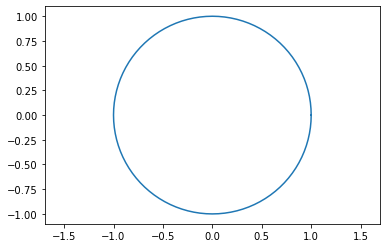

In [113]:
plt.plot(cosx,sinx)
plt.axis('equal')

**Optional:** We can change the plotting backend to make figures sharper:

In [115]:
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, 'My plot')

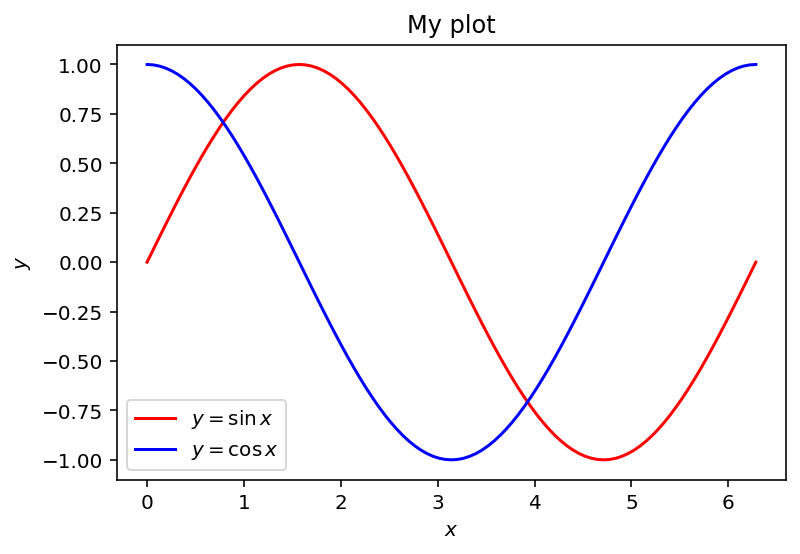

In [116]:
plt.plot(x,sinx,'r',label='$y = \sin x$')
plt.plot(x,cosx,'b',label='$y = \cos x$')

plt.legend()

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('My plot')

# Wednesday, February 22nd 2023

In [1]:
import matplotlib.pyplot as plt

Work on `ptriples` function for Project 2.

In [2]:
help(range)

Help on class range in module builtins:

class range(object)
 |  range(stop) -> range object
 |  range(start, stop[, step]) -> range object
 |  
 |  Return an object that produces a sequence of integers from start (inclusive)
 |  to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
 |  start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
 |  These are exactly the valid indices for a list of 4 elements.
 |  When step is given, it specifies the increment (or decrement).
 |  
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |

In [3]:
from math import sqrt

In [21]:
a = 3
b = 4

c = sqrt(a**2 + b**2)
print(c == int(c))

True


In [18]:
a = 1
b = 2
c = round(sqrt(a**2 + b**2))    # This is the closest integer to sqrt(a**2 + b**2)
print(a**2 + b**2 == c**2)

False


In [25]:
triples = [(3,4,5),(5,12,13),(6,8,10)]

triples += [(b,a,c) for (a,b,c) in triples if a != b]

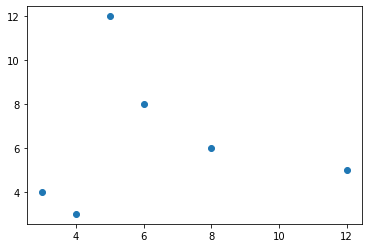

In [33]:
a_list = [a for (a,b,c) in triples]
b_list = [b for (a,b,c) in triples]

plt.plot(a_list,b_list,'o')

We can set the $x$ and $y$ bounds of a figure using `plt.xlim` and `plt.ylim`.

In [ ]:
ptriples_list = ptriples(1000)

#a_list, b_list = ....

plt.plot(a_list,b_list)

plt.xlim(0,21)
plt.ylim(0,21)


In [ ]:
plt.plot(a_list,b_list)
plt.xlim(0,101)
plt.ylim(0,101)

## Primitive Pythagorean triples

### The greatest common divisor

The greatest common divisor of two integers $a$ and $b$ is the largest integer that divides both $a$ and $b$. We denote this number by $\gcd(a,b)$.

Ex. $\gcd(6,8) = 2$.

If $\gcd(a,b) = 1$, then we say $a$ and $b$ are relatively prime.
We call a Pythogrean triple **primitive** if $a$ and $b$ are relatively prime.

We might be interested in studying the primitive Pythagorean triples.

One method of finding $\gcd(a,b)$ is by brute-force checking for divisors, then taking the largest:

In [34]:
def gcd(a,b):
    divisors = []
    for d in range(1, min(a,b) + 1):
        if a % d == 0 and b % d == 0:   # If d divides both a and b
            divisors.append(d)
            
    return max(divisors)

In [36]:
gcd(15,20)

5

## The Euclidean algorithm for computing the gcd

* Start with two integers $a$ and $b$
* Subtract the smaller number for the larger and replace the larger with this new number
* Repeat the above step until one of the numbers is 0
* The other number is the $\gcd(a,b)$

**Exercise.** Create a function `gcd(a,b)` that implements the above algorithm.

In [39]:
a = 8
b = 6

if b < a: 
    a,b = b,a
    
print(a,b)

6 8


In [37]:
def gcd(a,b):
    

Help on built-in function gcd in module math:

gcd(*integers)
    Greatest Common Divisor.



In [ ]:
def ptriples(n, include_repeats = True):
    ...
    return ptriples_list

In [ ]:
[(a,b,c) for (a,b,c) in ptriples_list if gcd(a,b) == 1]